<a href="https://colab.research.google.com/github/ismael-rtellez/Housing_Information_Analysis_Series/blob/main/Analysis_of_housing_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1: Obtaining a Dataset

In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Problem 2: Investigating the dataseet itself

According to Kaggle's description, this dataset contains housing data from Ames, Iowa, with the following characteristics:
*  It contains residential property sales in Ames between 2006 and 2010
*  It includes 79 explanatory vaiables (features) describing various aspects of residential homes
*  These features include information about lot size, neighborhood, quality ratings, room counts, construction materials, etc.
*  The target variable is SalePrice, representing the property's sale price in dollars
*  The dataset is often used for regression modeling and price prediction

## Problem 3: Checking the data

### See what each feature is about. (Numerical data or text data, etc.)

In [3]:
# Display basic information about the dataset
print("Dataset shape: ", df.shape)
# First few rows of the dataset
df.head()

Dataset shape:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Observation:
- There are 1460 rows (houses)
- 81 columns in total: 80 features + 1 target (SalePrice)

Some features may have missing values

In [4]:
# Check the data types
df.dtypes.value_counts()

,count
object,43
int64,35
float64,3


Observation:
- object: Usually categorical or ordinal
- int64/float64: Numerical (continuous or discret)

In [5]:
# Check which column is the target variable
df["SalePrice"].head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


Observations
- The target variable is SalePrice, which is a continuous numerical variable

In [6]:
# Display statistical summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Observations
- Houses price range from 34,900 to 755,000, which a median of $180,921
- Lot sizes range from 1,300 to 215,245 square feet
- Must houses have 3 bedrooms and 2 bathrooms

## Problem 4: Dealing with missing values

### Check for the missing valuesfor each feature

In [7]:
import missingno as msno

# check for missing values
missing_values = df.isnull().sum()

# missing values count
missing_values[missing_values > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


### Check the percentage of missing values

In [8]:
total = df.shape[0]
missing_percentage = (missing_values / total) * 100
missing_data = pd.DataFrame({
    "Total" : missing_values,
    "missing_ratio" : missing_percentage
})
missing_data

,Total,missing_ratio
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


### Delete features (columns) that have 5 or more missing values

In [9]:
features_to_drop = missing_data[missing_data['Total']>= 5].index.to_list()

df_dropped = df.drop(columns=features_to_drop)

print(features_to_drop)
print(f"Dropped {len(features_to_drop)} features.")

print(df_dropped.shape)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Dropped 18 features.
(1460, 63)


### Samples (rows) with missing values are deleted from the data from which features with 5 or more missing values have been deleted

In [10]:
# drop rows with any remaining missing values
df_cleaned = df_dropped.dropna()
print("Shape after dropping rows with missing values:", df_cleaned.shape)

Shape after dropping rows with missing values: (1459, 63)


## Problem 5: Researching terminology

Summary of terms:

1. **Kurtosis** - Measures how "tailed" or "peaked" a distribution is compared to a normal distribution. A measure of the concentration of a distribution.
  - **High kurtosis** = Heavy tails and sharp peak (more outliers)
  - **Low kurtosis** = light tails and flatter peak (fewer outliers)

2. **Skewness** - Measures the asymmetry of a distribution.
  - **Positive skew** = Right tail longer (mean > median)
  - **Negative skew** = Left tail longer (mean < median)
  - **Zero skew** = Symmetrical (normal distribution)

### Confirming Distribution

### Display the distribution of objective variables

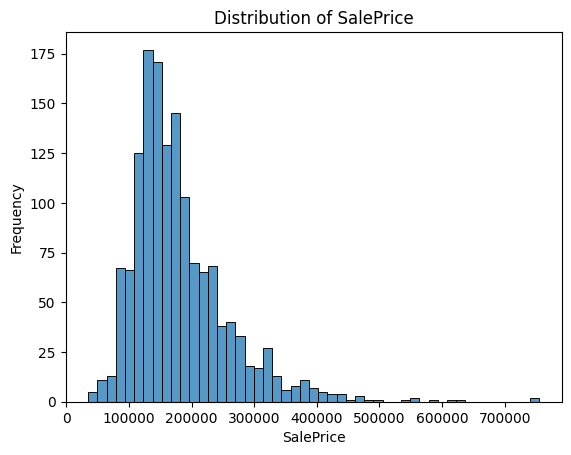

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using hisplot
sns.histplot(df["SalePrice"])
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

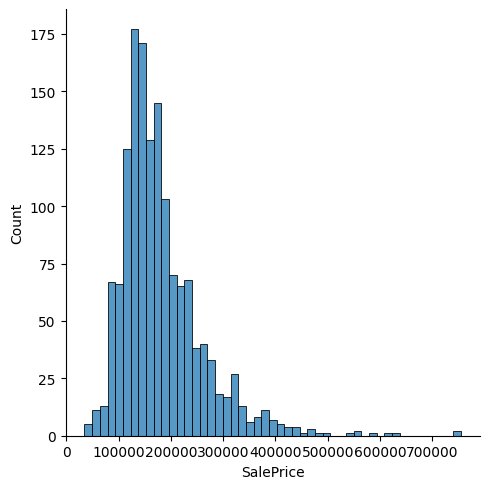

In [12]:
# using displot
sns.displot(df["SalePrice"]);

In [13]:
# calculating kurtosis and skewness
print("Skewness: ", df['SalePrice'].skew())
print("Kurtosis: ", df['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


### Perform a log transformation on the objective variable

In [14]:
import numpy as np

log_transformed_obj_var = np.log(df['SalePrice'])

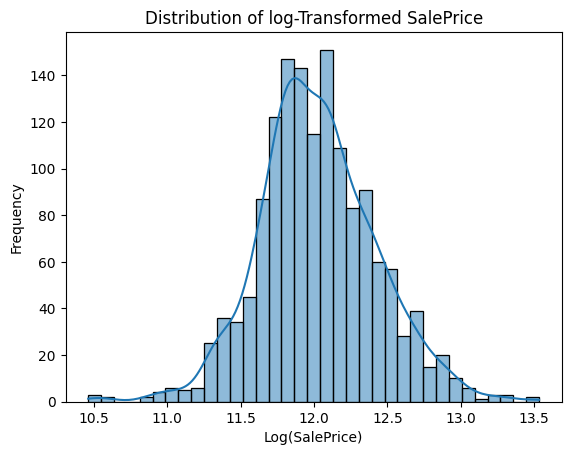

In [ ]:
# graph again using hisplot
sns.histplot(log_transformed_obj_var, kde=True)
plt.title("Distribution of log-Transformed SalePrice")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()

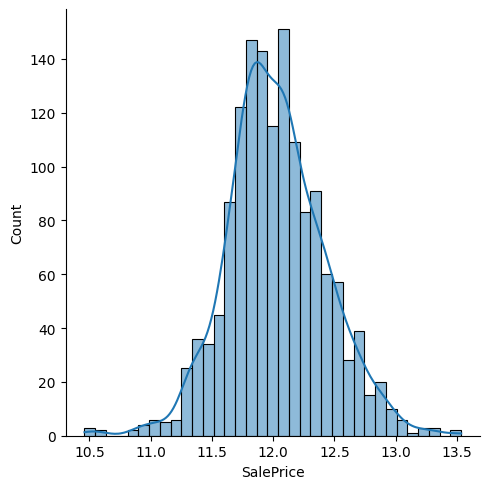

In [15]:
sns.displot(log_transformed_obj_var, kde=True);

In [16]:
# calculating kurtosis and skewness for log-transformed data
print("Log-Transformed SalePrice statistic:")
print("Skewness: ", log_transformed_obj_var.skew())
print("Kurtosis: ", log_transformed_obj_var.kurt())

Log-Transformed SalePrice statistic:
Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


### Please explain the change before and after logarithmic transformation, including the term "normal distribution"

**The original SalePrice distribution shows:**
- Strong positive skewness (1.88): A long right tail indicates many lower-priced homes and fewer high-priced homes.
- High kurtosis (6.54): More outliers than a normal distribution would have.
- The distribution is clearly not normal

**After logarithmic transformation:**
- Skewness reduced to nearly to zero (0.12): The distribution becomes much more symmetrical.
- Kurtosis closer to normal (0.80): The extreme values are moderated
- The distribution closely resembles a normal distribution

## Problem 7: Confirming the correlation coefficient

### Create a heatmap of the correlation coefficient matrix

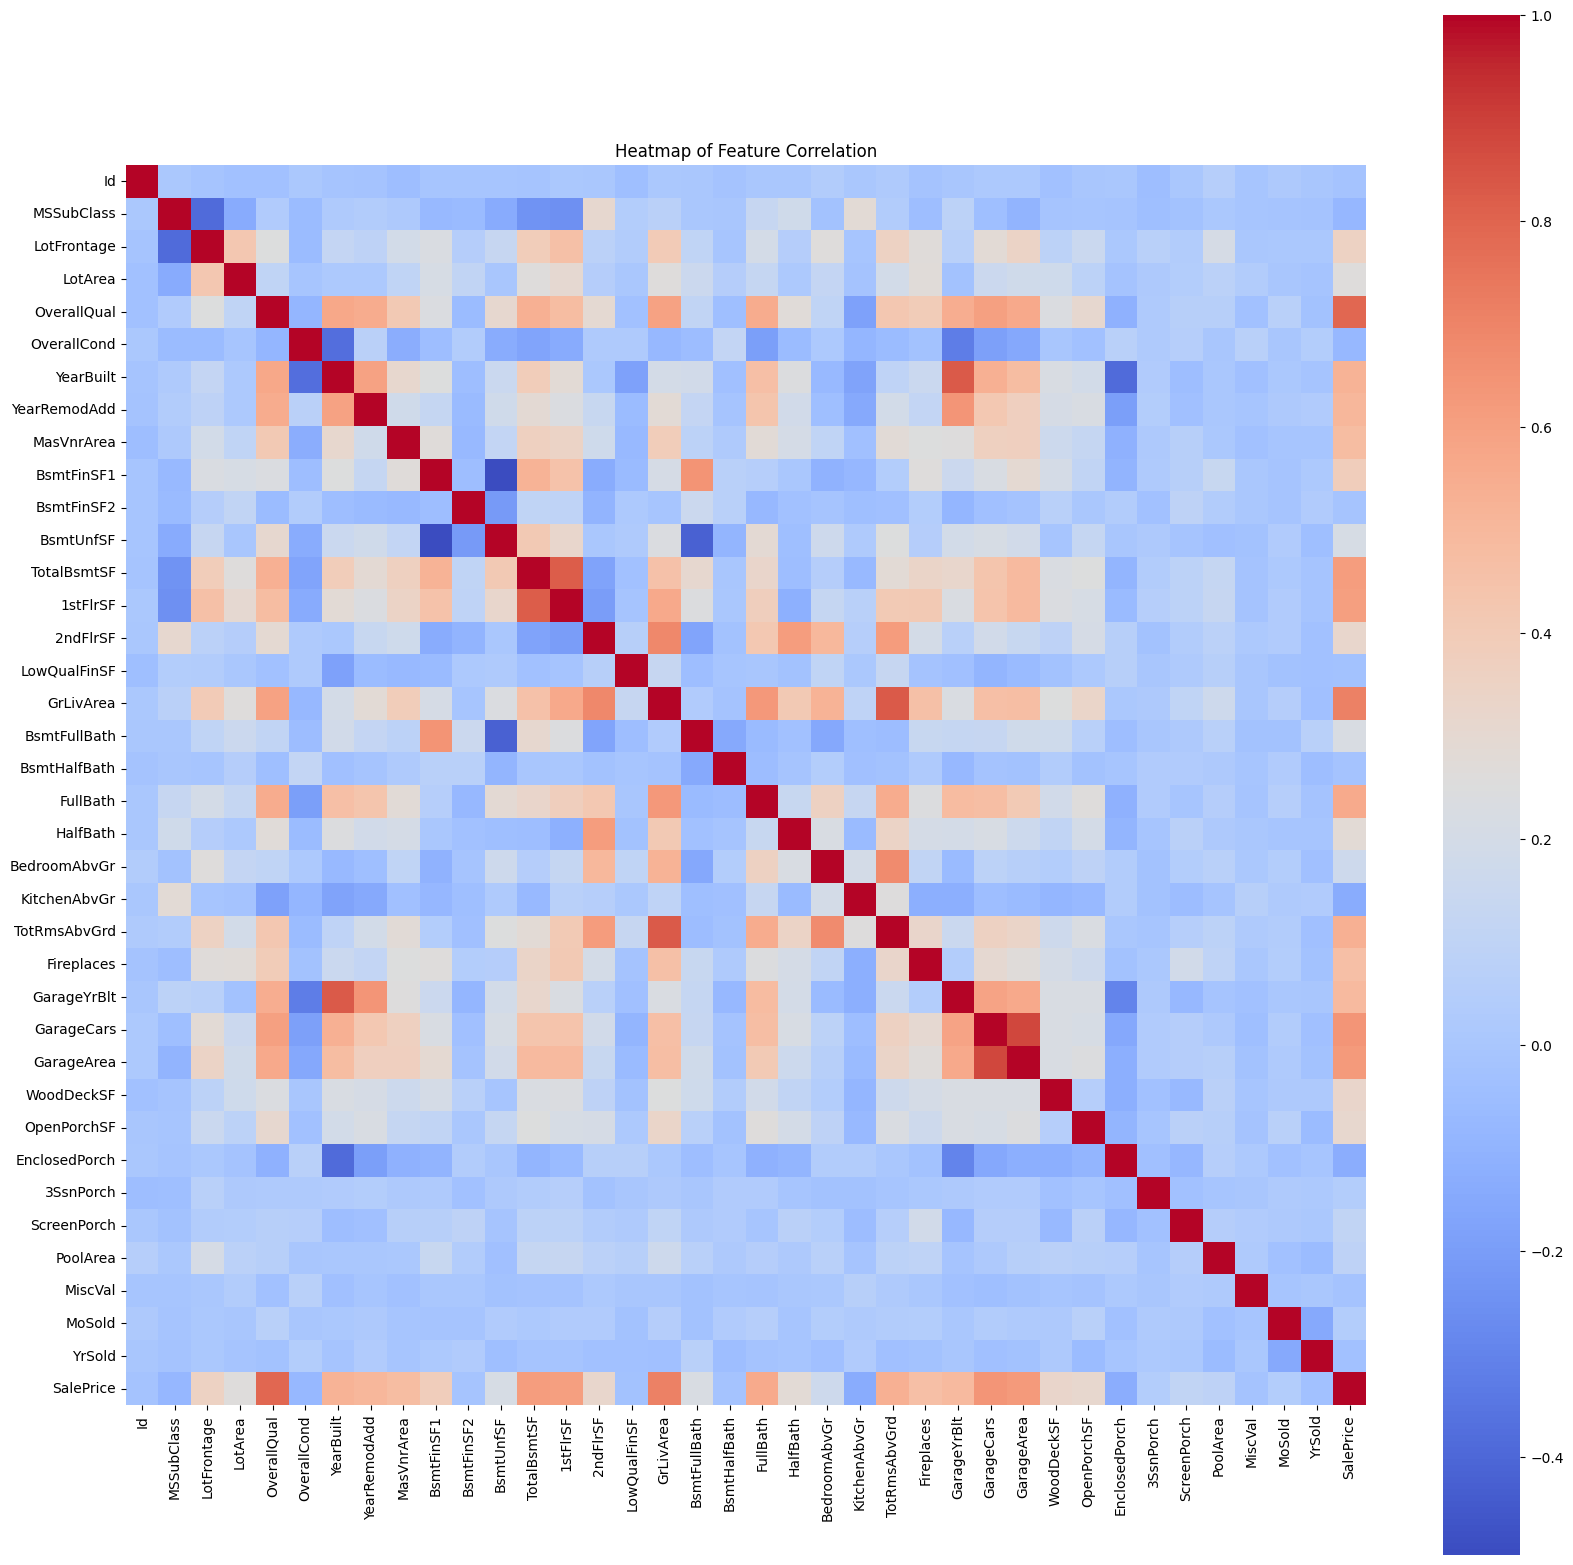

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation Matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Graph Heat map
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True)
plt.title("Heatmap of Feature Correlation")
plt.show()

Observation
- Red areas → Strong positive correlation (when one feature increases, the other also increases)
- Blue areas → Strong negative correlation (when one feature increases, the other decreases)

### Selecting highly correlated features

In [18]:
# identify the 10 features most correlated with SalePrice
# Sort correlations with SalePrice
top_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
top_features[1:11]

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


**Observations**  
Highly correlated features often include:
- ```OverallQual```→ House quality rating.
- ```GrLivArea```→ Above-ground living spaces.
- ```GarageCars```→ Number of garage spaces.
- ```GarageArea```→ Basement size.
- ```TotalBsmtSF```→ First-floor living space.



In [19]:
# Coefficient matrix
target_features = df[top_features[1:11].index]
display(target_features)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


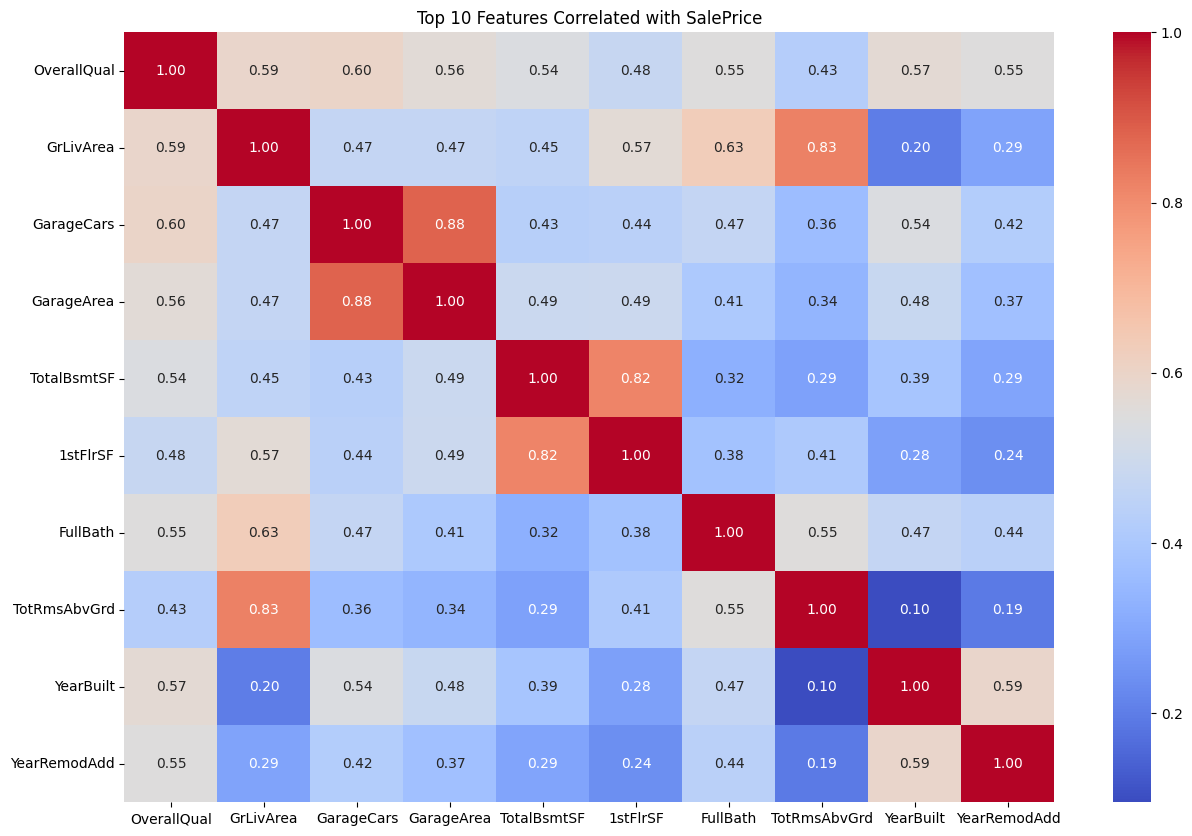

In [20]:
# heatmap of top features
plt.figure(figsize=(15,10))
sns.heatmap(target_features.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()

**Observation**
- It two features are **highly correlated with each other**, it might mean **redundancy** in the dataset.
- Features like ```GarageCars``` and ```GarageArea``` might be too **similar**, requering careful selection.

It can be seen that some of these features have high dependancy and all of them largely contribute to the target feature SalePrice. For example, the top 3 correlation coefficients are from:

- ```GarageCars``` and ```GarageArea```
- First Floor square feet ```1stFlrSF``` and Total square feet of basement area ```TotalBsmtSF```
- Total rooms above grade (does not include bathrooms) ```TotRmsAbvGrd``` and Above grade (ground) living area square feet ```GrLivArea```


The 3 combinations with high Correlation coefficients with each other are:
- GarageArea and GarageCars = 0.88
- 1stFlrSF and TotalBsmtSF = 0.82
- GrLivArea and TotRmsAbvGrd = 0.83

